# Machine Learning Modeling
1. Logistic Regression 
2. MultinomialNB
3. DecisionTreeClassifier
4. RandomForestClassifier
5. GradientBoostingClassifier
6. XGBClassifier
7. MLP

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from tensorflow.keras.optimizers import Adam

# tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import pandas as pd
from scipy import sparse
import re
import pickle
import os
from urllib.parse import urlparse, parse_qs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, concatenate, Reshape, Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Conv1D, MaxPool1D, UpSampling2D
from keras.optimizers import Adam
import keras
from keras.models import Sequential
from keras.layers import InputLayer
filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = np.load('/content/drive/My Drive/test_colab/dataset_1_char_45000_15000.npy')
data

array([[  0., 104., 116., ...,   0.,   0.,   0.],
       [  0., 104., 116., ...,   0.,   0.,   0.],
       [  0., 104., 116., ...,   0.,   0.,   0.],
       ...,
       [  1., 104., 116., ...,   0.,   0.,   0.],
       [  1., 104., 116., ..., 117., 115., 116.],
       [  1., 104., 116., ...,   0.,   0.,   0.]])

In [4]:
data.shape

(60000, 101)

In [ ]:
x = np.delete(data, 0, axis=1)

In [6]:
x.shape

(60000, 100)

In [ ]:
y = [row[0] for row in data]
y = np.asarray(y)

In [8]:
y.shape

(60000,)

In [9]:
X_train, X_test, Y_train0, Y_test0 = train_test_split(x, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, Y_train0.shape, Y_test0.shape

((48000, 100), (12000, 100), (48000,), (12000,))

In [ ]:
Y_train, Y_test = to_categorical(Y_train0, 2), to_categorical(Y_test0, 2)

In [ ]:
def model_func(model_nm, x_train, x_test, y_train, y_test):
  model = model_nm().fit(x_train, y_train)

  y_test_pred = model.predict(x_test)
  print(classification_report(y_test, y_test_pred, target_names=['class 0', 'class 1']))
  
  # history_recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')

  return model
         

In [12]:
model_lr = model_func(LogisticRegression, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.90      0.96      0.92      8953
     class 1       0.84      0.68      0.75      3047

    accuracy                           0.88     12000
   macro avg       0.87      0.82      0.84     12000
weighted avg       0.88      0.88      0.88     12000



In [13]:
recall_lr  = cross_val_score(model_lr, X_train, Y_train0, cv=10, scoring='recall')
recall_lr

array([0.65719064, 0.659699  , 0.6722408 , 0.68284519, 0.66610879,
       0.68451883, 0.69121339, 0.64769874, 0.68786611, 0.66108787])

In [14]:
model_NB = model_func(MultinomialNB, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.84      0.90      0.87      8953
     class 1       0.63      0.49      0.55      3047

    accuracy                           0.80     12000
   macro avg       0.73      0.69      0.71     12000
weighted avg       0.79      0.80      0.79     12000



In [15]:
recall_NB  = cross_val_score(model_NB, X_train, Y_train0, cv=10, scoring='recall')
recall_NB

array([0.49080268, 0.47157191, 0.48327759, 0.51297071, 0.48368201,
       0.50627615, 0.49623431, 0.47782427, 0.48786611, 0.47782427])

In [16]:
model_dt = model_func(DecisionTreeClassifier, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.93      0.93      0.93      8953
     class 1       0.79      0.80      0.80      3047

    accuracy                           0.90     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.90      0.90      0.90     12000



In [17]:
recall_dt  = cross_val_score(model_dt, X_train, Y_train0, cv=10, scoring='recall')
recall_dt

array([0.79849498, 0.80100334, 0.80936455, 0.81338912, 0.78577406,
       0.79832636, 0.80669456, 0.78075314, 0.81506276, 0.80167364])

In [18]:
model_rf = model_func(RandomForestClassifier, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.94      0.97      0.95      8953
     class 1       0.92      0.80      0.85      3047

    accuracy                           0.93     12000
   macro avg       0.93      0.89      0.90     12000
weighted avg       0.93      0.93      0.93     12000



In [19]:
recall_rf  = cross_val_score(model_rf, X_train, Y_train0, cv=10, scoring='recall')
recall_rf

array([0.80183946, 0.80183946, 0.80351171, 0.8209205 , 0.7916318 ,
       0.80669456, 0.81757322, 0.78828452, 0.81924686, 0.78075314])

In [20]:
model_gb = model_func(GradientBoostingClassifier, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94      8953
     class 1       0.88      0.73      0.80      3047

    accuracy                           0.91     12000
   macro avg       0.90      0.85      0.87     12000
weighted avg       0.91      0.91      0.90     12000



In [21]:
recall_gb  = cross_val_score(model_gb, X_train, Y_train0, cv=10, scoring='recall')
recall_gb

array([0.71989967, 0.71488294, 0.72575251, 0.73138075, 0.71046025,
       0.74560669, 0.74309623, 0.69456067, 0.73389121, 0.70794979])

In [22]:
model_xgb = model_func(xgboost.XGBClassifier, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.91      0.97      0.94      8953
     class 1       0.89      0.71      0.79      3047

    accuracy                           0.91     12000
   macro avg       0.90      0.84      0.87     12000
weighted avg       0.90      0.91      0.90     12000



In [23]:
recall_xgb = cross_val_score(model_xgb, X_train, Y_train0, cv=10, scoring='recall')
recall_xgb

array([0.69397993, 0.68896321, 0.7048495 , 0.71799163, 0.69707113,
       0.72803347, 0.72133891, 0.67447699, 0.72301255, 0.69623431])

In [24]:
model_svc = model_func(SVC, X_train, X_test, Y_train0, Y_test0)

              precision    recall  f1-score   support

     class 0       0.89      0.97      0.93      8953
     class 1       0.88      0.64      0.74      3047

    accuracy                           0.89     12000
   macro avg       0.88      0.81      0.84     12000
weighted avg       0.89      0.89      0.88     12000



In [25]:
recall_svc = cross_val_score(model_svc, X_train, Y_train0, cv=10, scoring='recall')
recall_svc

array([0.62458194, 0.61371237, 0.62541806, 0.64686192, 0.62594142,
       0.64686192, 0.64351464, 0.62677824, 0.64016736, 0.6251046 ])

In [32]:
# mlp
mlp_model = Sequential()
mlp_model.add(Dense(20, activation='relu', input_dim=100))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(2, activation='softmax'))
mlp_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
mlp_model.fit(X_train, Y_train, epochs=20, batch_size=512)
y_pred_model = mlp_model.predict(X_test.astype("float"))
y_pred = np.where(y_pred_model > 0.5, 1, 0)
print(classification_report(Y_test, y_pred, target_names=['class 0', 'class 1']))

Epoch 1/20
48000/48000 [==============================] - 2s 42us/step - loss: 24.9919 - categorical_accuracy: 0.6851
Epoch 2/20
48000/48000 [==============================] - 0s 6us/step - loss: 2.2692 - categorical_accuracy: 0.7494
Epoch 3/20
48000/48000 [==============================] - 0s 6us/step - loss: 0.9708 - categorical_accuracy: 0.7788
Epoch 4/20
48000/48000 [==============================] - 0s 6us/step - loss: 0.8910 - categorical_accuracy: 0.7850
Epoch 5/20
48000/48000 [==============================] - 0s 6us/step - loss: 0.6105 - categorical_accuracy: 0.7893
Epoch 6/20
48000/48000 [==============================] - 0s 6us/step - loss: 0.5806 - categorical_accuracy: 0.7918
Epoch 7/20
48000/48000 [==============================] - 0s 6us/step - loss: 0.5261 - categorical_accuracy: 0.7973
Epoch 8/20
48000/48000 [==============================] - 0s 5us/step - loss: 0.4641 - categorical_accuracy: 0.8026
Epoch 9/20
48000/48000 [==============================] - 0s 6us/step 

In [ ]:
def func1():
    model = Sequential()
    model.add(Dense(20, activation='relu', input_dim=100))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
  
    return model

In [34]:
neural_network = KerasClassifier(build_fn=func1, epochs=10, batch_size=10, verbose=0)
recall_mlp = cross_val_score(neural_network, X_train, Y_train0, cv=10, scoring='recall')
recall_mlp

array([0.61767135, 0.46560403, 0.49568966, 0.62859491, 0.52560873,
       0.64732143, 0.4480737 , 0.60083333, 0.56756757, 0.00165289])

In [ ]:
# cnn
recall_cnn = np.array([0.87546816, 0.82075472, 0.91468254, 0.89468691, 0.89258555,
       0.86363636, 0.        , 0.89126394, 0.89878163, 0.89514563])

In [ ]:
recall = pd.DataFrame({'LogisticRegression' : recall_lr, 'Multinomial Naive Bayes' : recall_NB, 'Decision tree' : recall_dt, 'Random Forest' : recall_rf, 'Gradient Boosting' : recall_gb, 'XGBooster' : recall_xgb, 'SVC' : recall_svc, 'MLP': recall_mlp, 'CNN' : recall_cnn})

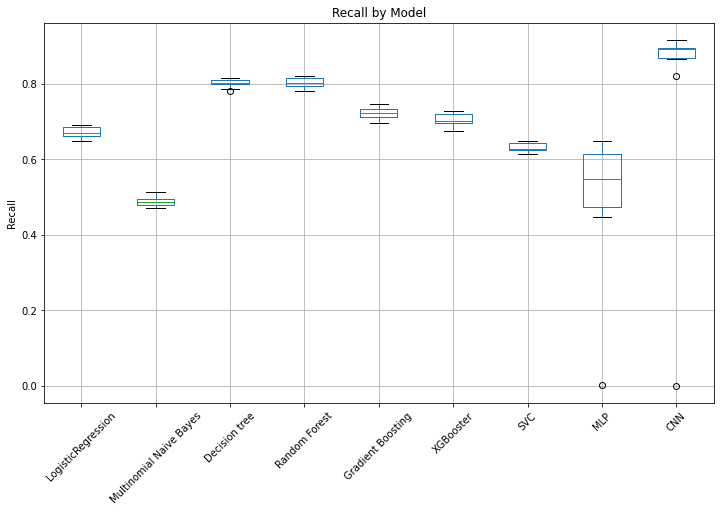

In [38]:
## boxplot
plt.figure(figsize=(12, 7))
recall.boxplot(column= ['LogisticRegression', 'Multinomial Naive Bayes', 'Decision tree', 'Random Forest', 'Gradient Boosting', 'XGBooster', 'SVC', 'MLP', 'CNN']) 
plt.xticks(size = 10, rotation=45)
plt.yticks(size = 10)
plt.title('Recall by Model')
plt.ylabel("Recall")
plt.show()